<a href="https://colab.research.google.com/github/Yi-Lai-SJSU/CMPE258/blob/master/Copy_of_cmpe257_lab1_kaggle_data_reault_1_with_30.43%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Feb 27 19:57:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/cifar100/'  #change dir to your project folder

In [0]:
import pandas as pd

In [0]:
df_images = pd.read_csv(root_path + 'CIFAR_train_images.csv')  

In [9]:
df_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,231,176,237,255,255,255,255,255,252,242,229,195,212,182,255,254,254,254,254,254,254,254,...,81,58,45,26,2,3,56,87,41,39,56,43,30,62,81,49,66,65,90,102,89,75,65,50,48,64,67,68,48,25,43,74,76,47,47,24,4,10,59,79
1,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,252,253,253,253,253,253,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,253,253,253,253,253,253,253,253,252,253,253,253,253,253,253,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,255
2,250,248,247,248,249,249,248,248,247,247,247,246,245,245,246,246,246,244,242,244,247,248,247,247,246,247,249,250,250,250,250,249,250,248,247,249,250,250,250,249,...,151,148,147,147,148,151,180,228,226,224,225,224,224,223,220,215,210,208,207,208,209,209,207,206,206,205,204,202,198,197,197,196,193,191,190,189,190,194,207,228
3,124,131,135,138,140,144,148,152,156,158,160,161,165,172,175,177,185,188,193,198,199,195,188,177,169,167,166,165,158,149,143,136,121,128,134,140,144,149,156,159,...,222,222,223,224,217,221,233,230,25,23,29,39,38,33,23,23,28,78,181,208,202,199,208,212,215,212,210,208,196,190,198,206,215,216,217,221,223,232,236,231
4,43,32,87,127,55,48,51,87,121,113,135,126,119,122,153,155,147,175,201,162,143,188,137,94,114,87,103,70,75,74,43,39,44,38,59,136,90,50,49,63,...,63,45,69,34,73,54,36,32,57,47,67,43,39,37,36,44,32,18,52,37,27,50,86,97,78,59,37,63,109,81,38,63,70,54,76,50,78,60,29,37


In [0]:
df_labels = pd.read_csv(root_path + 'CIFAR_train_labels.csv')  

In [11]:
df_labels.head()

,0
0,19
1,29
2,0
3,11
4,1


In [0]:
def load_data_cifar100(image_path, label_path):
    images = pd.read_csv(image_path).to_numpy().reshape(-1,3,32,32).transpose(0,2,3,1)
    labels = pd.read_csv(label_path)
    return images, labels

In [0]:
images, labels = load_data_cifar100(image_path = root_path + 'CIFAR_train_images.csv',
                                    label_path = root_path + 'CIFAR_train_labels.csv')

In [48]:
print(images.shape)
print(labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [0]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
train_images, test_images,  train_labels, test_labels   = train_test_split(images,       labels,       test_size = 0.1)
train_images, valid_images, train_labels, valid_labels  = train_test_split(train_images, train_labels, test_size = 0.1)

In [50]:
print(train_images.shape)
print(valid_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(valid_labels.shape)
print(test_labels.shape)

(40500, 32, 32, 3)
(4500, 32, 32, 3)
(5000, 32, 32, 3)
(40500, 1)
(4500, 1)
(5000, 1)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [0]:
train_datagen.fit(train_images)
valid_images = valid_images/255.0
test_images  = test_images/255.0

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, activation='sigmoid')
])

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images)/32, 
                    epochs=50,
                    validation_data=(valid_images, valid_labels))

  ...
    to  
  ['...']
Train for 1265.625 steps, validate on 4500 samples
Epoch 1/50
1266/1265 [==============================] - 25s 20ms/step - loss: 4.1199 - accuracy: 0.0627 - val_loss: 3.7275 - val_accuracy: 0.1291
Epoch 2/50
1266/1265 [==============================] - 24s 19ms/step - loss: 3.6723 - accuracy: 0.1351 - val_loss: 3.3496 - val_accuracy: 0.1873
Epoch 3/50
1266/1265 [==============================] - 24s 19ms/step - loss: 3.3942 - accuracy: 0.1812 - val_loss: 3.0671 - val_accuracy: 0.2400
Epoch 4/50
1266/1265 [==============================] - 24s 19ms/step - loss: 3.2162 - accuracy: 0.2141 - val_loss: 2.9646 - val_accuracy: 0.2600
Epoch 5/50
1266/1265 [==============================] - 24s 19ms/step - loss: 3.0986 - accuracy: 0.2359 - val_loss: 2.7689 - val_accuracy: 0.3067
Epoch 6/50
1266/1265 [==============================] - 24s 19ms/step - loss: 3.0108 - accuracy: 0.2542 - val_loss: 2.7468 - val_accuracy: 0.3127
Epoch 7/50
1266/1265 [==========================

In [55]:
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.154832209777832 / Test accuracy: 0.4438000023365021


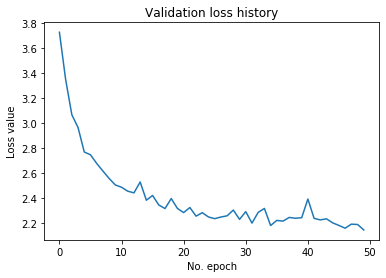

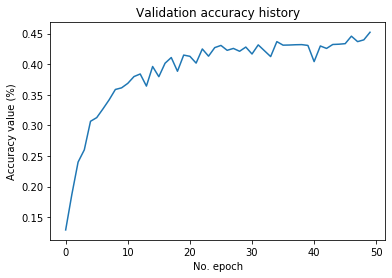

In [56]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [58]:
new_model = models.load_model(root_path+"model-2.h5")
new_model.summary()
loss, acc = new_model.evaluate(test_images, test_labels, verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
df_predict_images = pd.read_csv(root_path + 'CIFAR_test_images.csv')

In [112]:
df_predict_images.drop(['index'], axis=1, inplace=True)
df_predict_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,199,196,195,195,196,197,198,198,199,201,203,205,206,207,208,209,209,209,210,210,211,211,211,211,211,212,213,215,215,216,217,224,197,195,195,196,197,200,202,202,...,156,185,200,220,230,220,192,149,118,123,127,124,115,123,129,129,137,143,141,135,144,152,160,166,156,140,152,159,176,201,197,167,154,172,183,209,217,215,211,183
1,113,88,72,63,72,100,131,149,139,132,115,108,97,56,65,78,79,80,128,141,110,94,121,160,139,77,29,30,88,105,86,63,95,78,62,62,73,98,129,147,...,101,98,100,95,79,84,77,64,135,137,141,152,183,180,188,183,129,127,119,106,94,88,107,107,105,107,117,109,99,93,90,87,88,89,94,102,104,96,80,67
2,61,61,67,62,64,63,70,73,78,88,85,76,72,76,88,95,97,90,85,77,82,89,92,90,84,77,72,76,76,70,64,64,67,78,80,64,66,67,65,59,...,187,156,167,185,148,152,142,149,47,35,37,33,34,32,50,46,33,32,42,61,33,38,51,65,57,42,74,78,62,126,180,200,181,173,206,201,172,189,115,89
3,93,88,104,90,74,70,70,75,77,60,61,79,75,64,44,40,46,65,82,65,46,59,68,60,58,38,28,28,103,185,188,198,87,61,54,84,96,87,98,113,...,120,118,111,111,120,135,163,213,248,219,187,173,172,173,173,171,172,169,169,169,165,165,170,169,167,167,167,166,166,170,170,168,168,168,163,160,163,173,191,223
4,80,80,82,86,92,97,96,97,98,99,100,102,104,105,106,110,113,111,111,111,112,110,105,102,100,98,97,94,90,89,86,83,86,88,89,92,98,103,104,105,...,41,40,38,37,36,34,32,30,32,34,35,36,38,38,36,38,38,39,40,40,37,36,37,40,40,39,40,40,39,37,36,37,38,39,38,37,35,34,32,29


In [113]:
df_predict_images.shape

(10000, 3072)

In [0]:
predict_images = df_predict_images.to_numpy().reshape(-1,3,32,32).transpose(0,2,3,1)

In [115]:
predict_images.shape

(10000, 32, 32, 3)

In [0]:
predict_images = predict_images/255.0

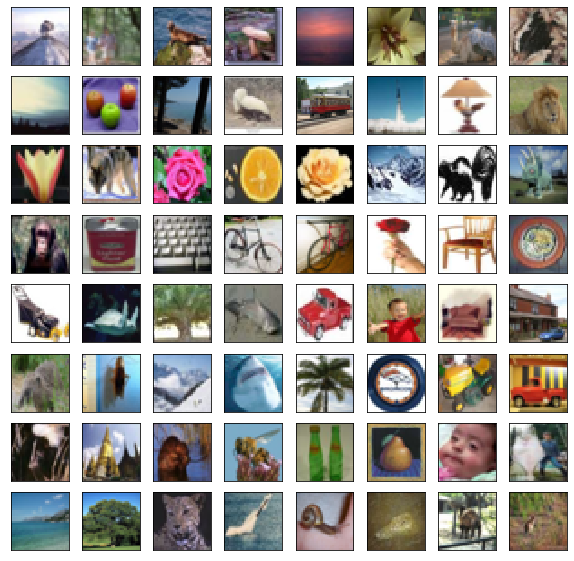

In [117]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predict_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()

In [0]:
predict_result = model.predict(predict_images)

In [119]:
df_predict_result = pd.DataFrame(data=predict_result)
df_predict_result.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.108251e-03,1.221987e-03,1.303820e-03,1.783393e-03,2.015779e-03,1.316309e-03,2.392069e-03,1.030300e-03,1.887540e-03,7.633567e-04,6.778710e-04,1.607578e-03,8.870760e-04,1.585247e-03,1.617348e-03,1.472795e-03,1.014956e-03,7.286025e-04,1.377538e-03,9.497374e-04,8.573831e-04,1.771620e-03,8.799973e-04,6.728982e-04,7.778872e-04,7.214390e-04,1.542042e-03,1.676299e-03,7.556731e-04,1.187608e-03,1.200887e-03,1.424697e-03,1.023990e-03,9.206901e-04,2.069697e-03,1.610748e-03,1.221535e-03,1.047767e-03,1.712108e-03,9.182545e-04,...,5.162340e-04,6.405613e-04,6.756259e-04,1.024841e-03,1.657994e-03,1.124730e-03,1.625994e-03,8.329431e-04,1.905938e-03,4.413832e-04,8.532914e-04,4.194969e-04,1.386330e-03,6.298067e-04,1.881704e-03,8.931393e-04,7.509640e-04,1.827328e-03,2.290167e-03,1.178397e-03,2.158753e-03,1.473586e-03,1.150529e-03,9.351177e-04,1.082357e-03,1.123377e-03,1.097011e-03,8.130435e-04,2.915120e-03,1.820270e-03,1.001510e-03,1.019193e-03,1.381371e-03,1.246650e-03,1.472733e-03,5.544830e-04,1.480176e-03,2.078440e-03,1.776255e-03,6.521373e-04
std,1.094756e-02,1.011519e-02,8.391965e-03,8.485467e-03,8.865592e-03,1.011943e-02,1.418928e-02,5.043281e-03,1.640893e-02,1.061079e-02,3.107711e-03,1.014603e-02,5.073662e-03,1.161827e-02,9.101871e-03,7.573107e-03,7.376155e-03,6.988295e-03,6.219679e-03,4.943791e-03,1.109118e-02,1.399473e-02,3.588670e-03,6.592164e-03,6.732679e-03,3.454441e-03,6.519113e-03,7.672860e-03,8.380309e-03,5.599754e-03,8.092807e-03,1.057345e-02,5.121232e-03,4.125916e-03,9.046900e-03,1.038582e-02,6.795641e-03,6.668097e-03,7.490135e-03,5.102937e-03,...,5.818543e-03,5.048075e-03,4.842943e-03,5.145113e-03,7.352134e-03,5.338506e-03,6.994533e-03,4.015420e-03,2.611136e-02,4.973575e-03,5.572164e-03,4.592957e-03,5.965367e-03,3.945379e-03,8.457771e-03,9.238455e-03,9.293769e-03,9.139819e-03,8.316969e-03,5.204740e-03,1.037863e-02,1.027501e-02,1.401227e-02,6.428988e-03,6.514950e-03,9.239794e-03,6.599829e-03,6.784734e-03,1.418681e-02,9.594425e-03,6.229450e-03,1.054247e-02,9.331367e-03,5.672752e-03,1.691381e-02,5.126026e-03,8.736161e-03,1.035309e-02,9.813450e-03,2.752119e-03
min,1.218159e-32,2.448983e-21,1.094307e-24,1.165390e-25,3.295580e-28,1.383596e-27,1.543327e-23,5.319340e-21,5.716394e-25,1.571112e-20,2.737374e-17,1.566109e-21,5.078541e-28,1.870149e-23,5.214361e-23,1.655550e-26,1.342027e-17,1.379740e-31,3.403540e-21,2.017066e-24,2.077958e-27,1.862831e-29,5.361092e-17,2.367545e-32,2.360356e-26,1.019168e-20,8.025284e-20,9.801413e-25,7.418717e-21,3.142938e-20,2.385394e-33,3.929798e-29,3.824927e-19,5.556406e-28,1.838659e-21,6.733074e-23,2.095970e-31,1.458196e-25,9.460906e-25,7.174479e-25,...,1.536921e-33,1.380762e-22,6.299810e-29,1.871429e-28,2.035159e-25,7.033358e-23,6.856851e-28

In [120]:
df_predict_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,5.091389e-14,3.045731e-07,7.213990e-07,1.467870e-06,2.785723e-06,4.549917e-07,1.184120e-09,5.500226e-06,2.289695e-04,4.500164e-08,2.592961e-08,7.389405e-07,1.429748e-03,8.192721e-07,1.517066e-08,1.152877e-06,2.340813e-07,5.363770e-07,1.786432e-06,1.608555e-07,5.720136e-07,1.475665e-07,1.457881e-06,1.275035e-06,5.852781e-07,1.470284e-06,2.392358e-06,3.081510e-05,2.346534e-08,1.096118e-05,9.276987e-04,2.850243e-07,9.089850e-07,1.079138e-07,1.214888e-07,2.144121e-07,1.141515e-09,2.384493e-06,3.035277e-06,1.327015e-05,...,9.911153e-08,3.579237e-09,1.695967e-12,7.818772e-07,1.721197e-06,7.599006e-07,1.480654e-06,2.871135e-06,1.375153e-04,1.438776e-05,3.011059e-10,2.840070e-06,6.686065e-05,1.410243e-05,1.840092e-06,8.330448e-07,7.712294e-05,1.705219e-06,1.191416e-05,2.025531e-04,5.880716e-07,3.369494e-07,1.252509e-08,2.108111e-11,5.789561e-06,6.658225e-06,3.086037e-06,8.424460e-08,2.008697e-09,1.388500e-07,6.700062e-05,2.986931e-06,1.823755e-10,4.120851e-05,9.739933e-14,8.042790e-04,1.433756e-07,1.572742e-06,9.750013e-07,3.116970e-06
1,1.065719e-08,1.200100e-06,6.911167e-07,9.349477e-05,1.107491e-04,3.931329e-07,2.833488e-05,3.850609e-07,1.117917e-04,1.549485e-06,2.980078e-07,1.249974e-06,3.457963e-05,7.165323e-08,1.228897e-05,2.452654e-05,1.614363e-06,6.320072e-07,4.149596e-04,1.259133e-05,1.362535e-08,4.374622e-08,3.952753e-06,1.174334e-07,1.027707e-07,1.559294e-06,2.415582e-06,6.259555e-05,1.192699e-06,1.574561e-04,5.693435e-07,4.941468e-05,1.402647e-05,7.198899e-03,2.872279e-04,5.173717e-06,2.070463e-06,2.184310e-05,2.440023e-03,4.492670e-06,...,2.514803e-09,3.854293e-08,1.220157e-09,2.017494e-04,3.101519e-05,5.493829e-04,2.211301e-04,6.485693e-05,1.885381e-05,1.043564e-06,6.904889e-08,1.080599e-09,1.510494e-05,6.186858e-08,1.501588e-04,9.975479e-09,2.428804e-07,7.047772e-05,4.890519e-05,2.149828e-04,3.149846e-03,2.652966e-06,8.296762e-08,8.872935e-07,5.515201e-06,2.740975e-08,3.555251e-07,9.934092e-08,9.999032e-04,5.578169e-06,1.099042e-07,1.198260e-06,2.503978e-08,5.922709e-06,6.306362e-07,8.674868e-09,1.229491e-03,4.512715e-04,2.410995e-06,2.263567e-05
2,6.846497e-06,3.609637e-04,5.439052e-05,2.046832e-02,4.460108e-02,1.732156e-06,7.117897e-03,3.220525e-04,2.447427e-05,3.288735e-07,2.597422e-05,5.635233e-05,2.251706e-05,5.163950e-05,7.404439e-04,6.967318e-03,2.703365e-06,9.464330e-05,1.562297e-03,1.280523e-03,2.175852e-07,2.812768e-05,5.779786e-05,7.831445e-06,2.703102e-03,3.433182e-05,5.493751e-03,5.397123e-03,1.271188e-05,1.618003e-03,4.902199e-04,1.949700e-04,2.289616e-03,5.023734e-06,1.632954e-02,2.208884e-04,6.999273e-04,1.377523e-04,1.826779e-03,1.366141e-05,...,9.735742e-07,1.623276e-06,9.733504e-07,1.077768e-03,3.784208e-04,5.739256e-04,1.570455e-04,3.915170e-03,6.205206e-07,3.056478e-05,5.106484e-05,9.933808e-08,1.661542e-02,2.797684e-04,1.787490e-03,3.716588e-06,3.047534e-06,4.044102e-03,2.820368e-04,7.370014e-04,6.536084e-03,8.309666e-06,1.525410e-04,5.011866e-06,1.861413e-05,2.500715e-05,3.762299e-06,1.005124e-06,2.387220e-03,1.329811e-03,3.446414e-04,3.381414e-04,2.548156e-05,1.106668e-02,1.144519e-07,5.591351e-04,5.695314e-05,4.649617e-04,2.406084e-05,7.662779e-06
3,5.371782e-07,2.772403e-05,6.347593e-05,1.569144e-03,1.800380e-03,7.890535e-04,2.602460e-06,6.210836e-07,1.154448e-05,1.757220e-05,4.313944e-04,2.970958e-04,8.803008e-04,1.135819e-03,1.088634e-05,6.109656e-03,1.664639e-04,6.761635e-05,7.726140e-05,6.107401e-03,2.252786e-04,3.955496e-04,2.240228e-04,3.343207e-06,4.455715e-06,1.677286e-03,3.944558e-04,6.325298e-04,1.221507e-04,8.249403e-04,3.447056e-06,3.634679e-03,2.182392e-05,1.034407e-04,2.288692e-03,2.014656e-04,7.493007e-05,1.534288e-03,1.929019e-03,5.221163e-05,...,7.292779e-07,1.187485e-06,4.441496e-08,3.854606e-05,9.410056e-05,8.597802e-05,1.490711e-04,1.049400e-

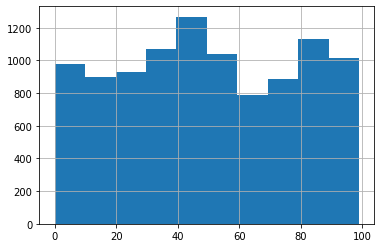

In [125]:
df_predict_class = df_predict_result.idxmax(axis=1)
df_predict_class.hist()

In [126]:
df_predict_class.to_csv(root_path + 'result-1.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
